In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading the data into Pands DataFrame


In [315]:
Heart_data=pd.read_csv('heart.csv')

In [316]:
Heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Discription of each column

In [317]:
info = ["\tAge","\t1: male, 0:female","\tChest Pain:\n \t\t\t(1)Tpyical angina\n\t\t\t(2)Atypical angina\n\t\t\t(3)Non-anginal Pain\n\t\t\t(4)asymptomatic","Resting Blood Pressure","\tSerum Cholestoral in mg/dl","\tFasting Blood sugar > 120 mg/dl","Resting electroCardiographic restult(values 0,1,2)","Maximum Heart rate achieved","\tExercise induced Angina","Oldpeak = ST depression induced by exercise relative to rest","\tThe slope of the peak exercise ST segment","\tNumber of Major vessels (0-3) colored by flourosopy","\tthal: 3-normal; 6-fixed defect; 7-reversable defect"]


for i in range(len(info)):
    print(Heart_data.columns[i]+":\t"+info[i])

age:		Age
sex:		1: male, 0:female
cp:		Chest Pain:
 			(1)Tpyical angina
			(2)Atypical angina
			(3)Non-anginal Pain
			(4)asymptomatic
trestbps:	Resting Blood Pressure
chol:		Serum Cholestoral in mg/dl
fbs:		Fasting Blood sugar > 120 mg/dl
restecg:	Resting electroCardiographic restult(values 0,1,2)
thalach:	Maximum Heart rate achieved
exang:		Exercise induced Angina
oldpeak:	Oldpeak = ST depression induced by exercise relative to rest
slope:		The slope of the peak exercise ST segment
ca:		Number of Major vessels (0-3) colored by flourosopy
thal:		thal: 3-normal; 6-fixed defect; 7-reversable defect


# Data 

In [318]:
print("Total number of rows and colums:",Heart_data.shape)
print("=================================================")
print(" ")
Heart_data.info()

Total number of rows and colums: (1025, 14)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [319]:
# Checking for missing values
Heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [320]:
#Statistical measures about data
Heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Target variable 

In [321]:
Heart_data['target'].unique()

array([0, 1])

In [322]:
print("0-> Heathy")
print("1-> Defective")
Heart_data.groupby('target').size()

0-> Heathy
1-> Defective


target
0    499
1    526
dtype: int64

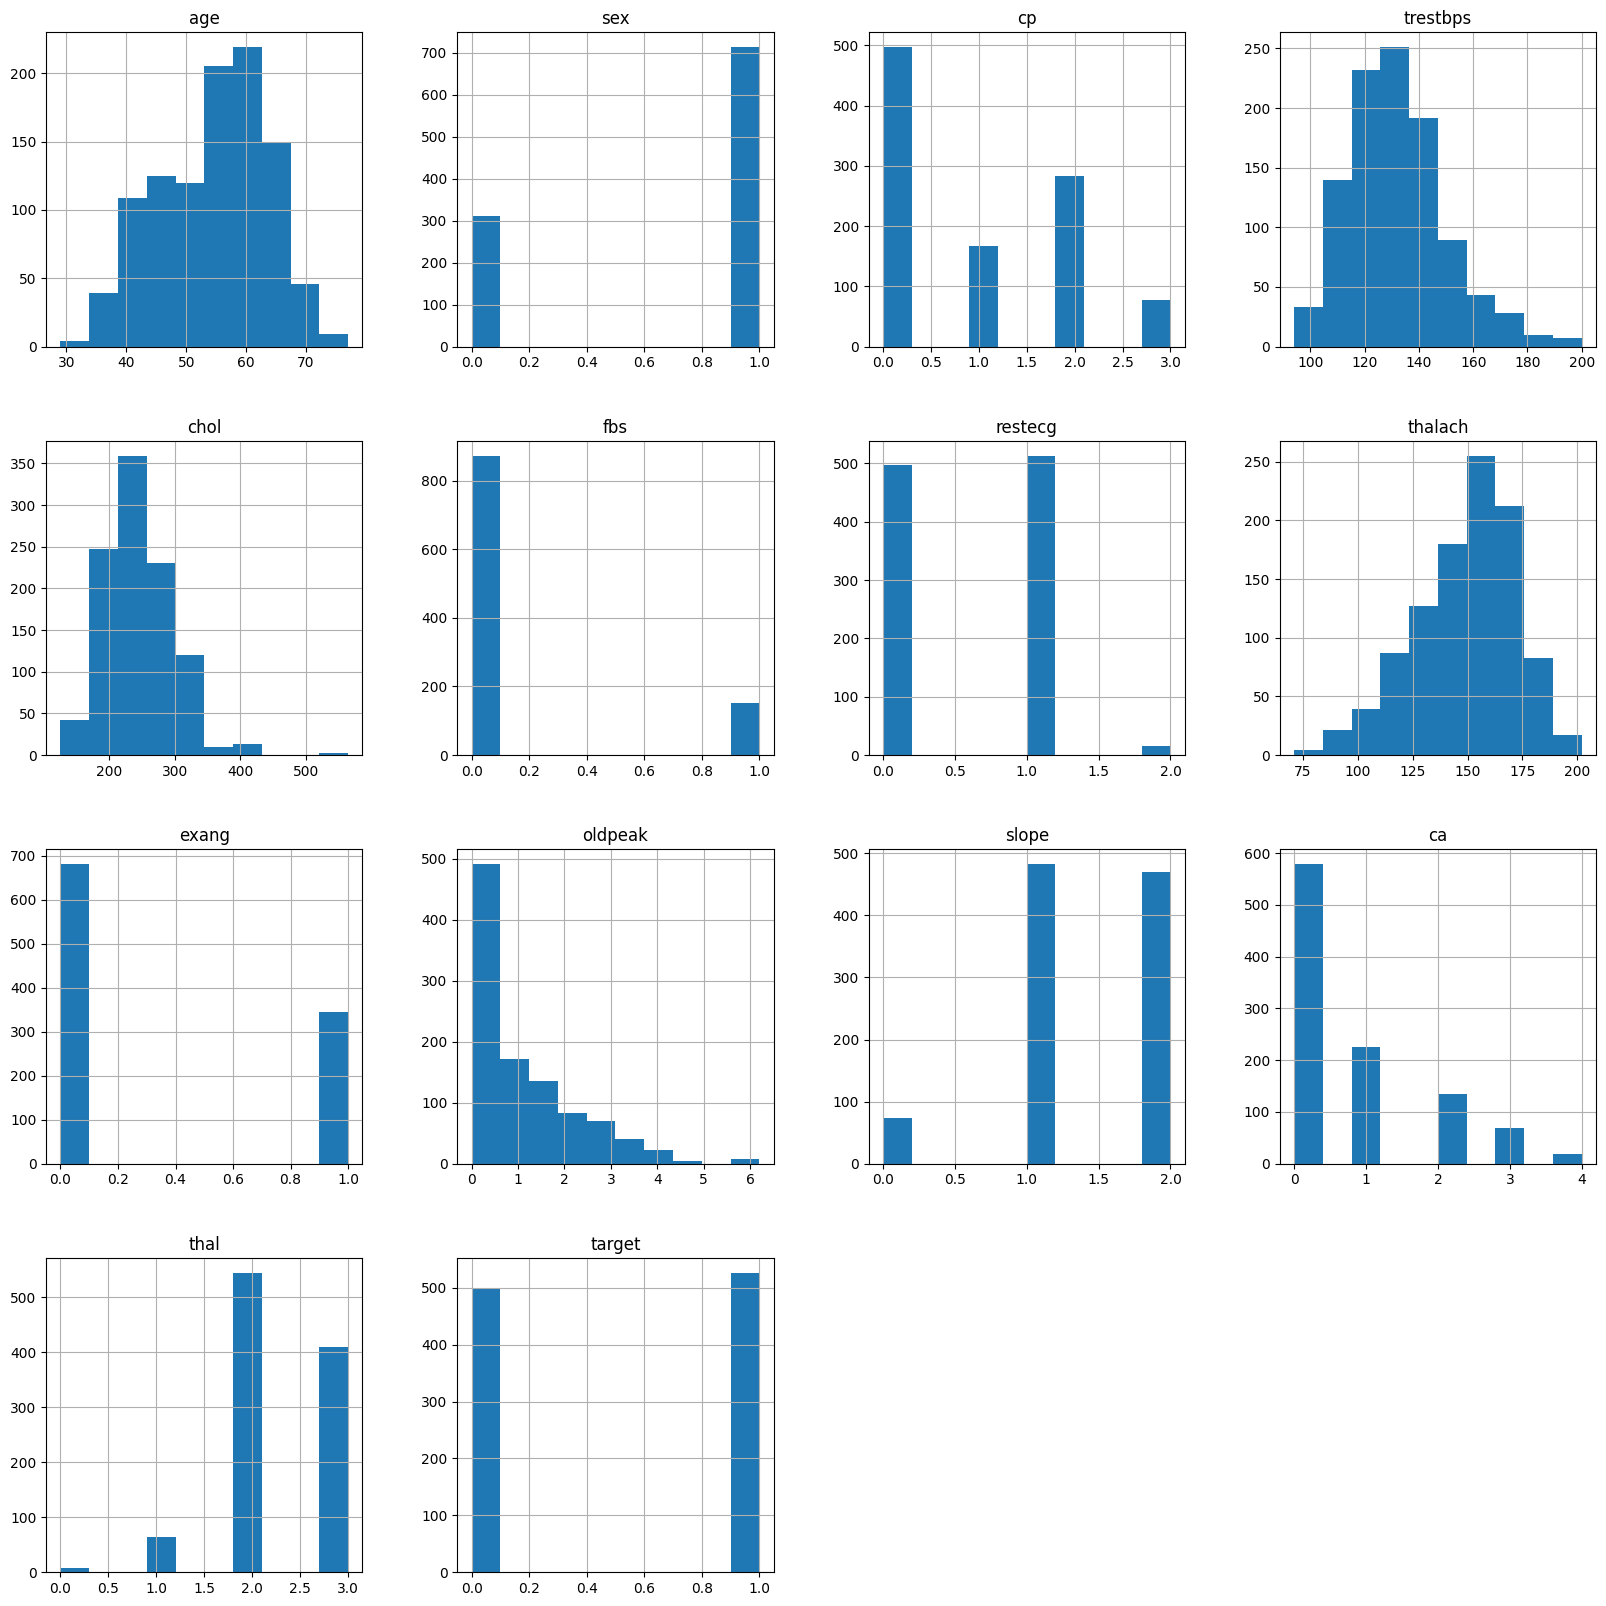

In [323]:
#viuallization of data
Heart_data.hist(figsize=(20,20))
plt.show()

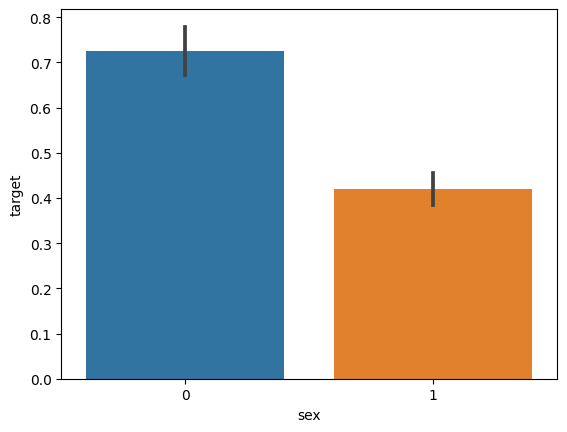

In [324]:
#percentage of having a Heart Disease in Female and male
sns.barplot(x="sex", y="target", data=Heart_data)
plt.show()

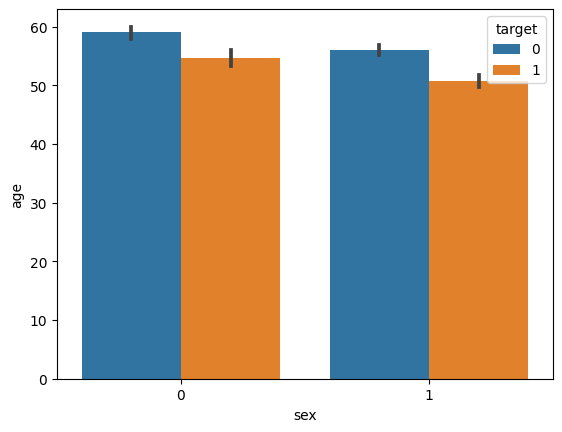

In [325]:
sns.barplot(x=Heart_data["sex"],y=Heart_data["age"],hue=Heart_data["target"])
plt.show()

In [327]:
#Number of females and males had Heart Disease
px.bar(Heart_data,Heart_data['sex'],Heart_data['target'])

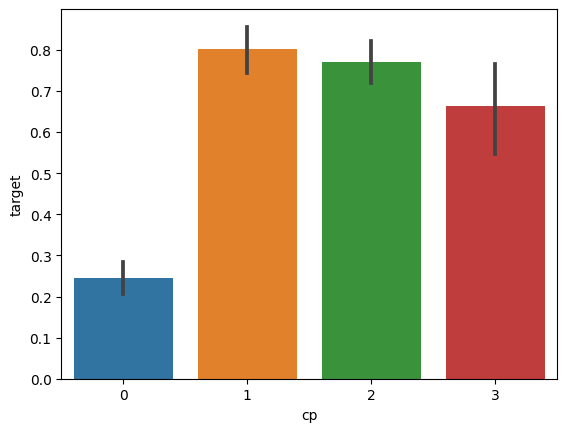

0->No pain
1->Tpyical angina
2->Atypical angina
3->Non-anginal Pain


In [328]:
# Probability of having Heart disease when that person having chest pain
sns.barplot(x='cp',y='target',data=Heart_data)
plt.show()
print("0->No pain")
print("1->Tpyical angina")
print("2->Atypical angina")
print("3->Non-anginal Pain")

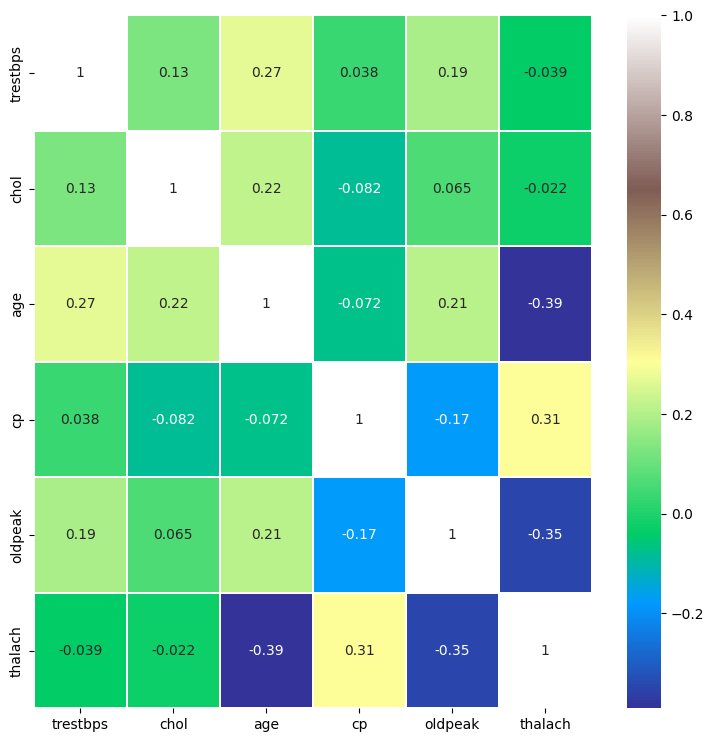

In [329]:
#Co-relation Heatmap
n=['trestbps','chol','age','cp','oldpeak','thalach']
sns.heatmap(Heart_data[n].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

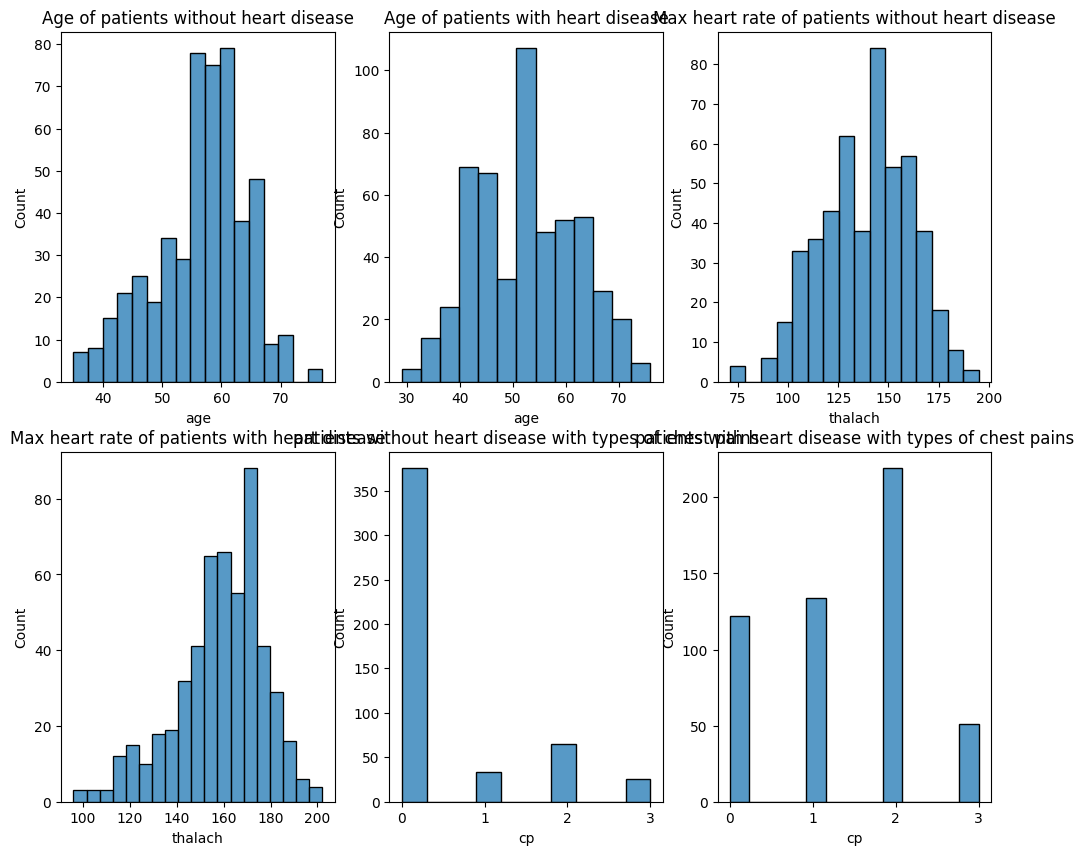

In [330]:
 #Creating distplots
plt.figure(figsize=(12,10))
plt.subplot(231)
sns.histplot(Heart_data[Heart_data['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(232)
sns.histplot(Heart_data[Heart_data['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(233)
sns.histplot(Heart_data[Heart_data['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(234)
sns.histplot(Heart_data[Heart_data['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.subplot(235)
sns.histplot(Heart_data[Heart_data['target']==0].cp )
plt.title('patients without heart disease with types of chest pains')
plt.subplot(236)
sns.histplot(Heart_data[Heart_data['target']==1].cp )
plt.title('patients with heart disease with types of chest pains')

plt.show()

# Data Processing

In [331]:
#Splitting the Features and Target
X = Heart_data.drop(columns='target', axis=1)
Y = Heart_data['target']

In [332]:
#Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Total number of rows and columns: ",X.shape)
print("Train set of X: ",X_train.shape)
print("Train set of Y: ",Y_train.shape)
print("Test set of X: ",X_test.shape)
print("Test set of Y: ",Y_test.shape)

Total number of rows and columns:  (1025, 13)
Train set of X:  (820, 13)
Train set of Y:  (820,)
Test set of X:  (205, 13)
Test set of Y:  (205,)


# Model

## Logistic Regression

Accuracy on Training data :  85.0 %
Accuracy on Test data :  80.0 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



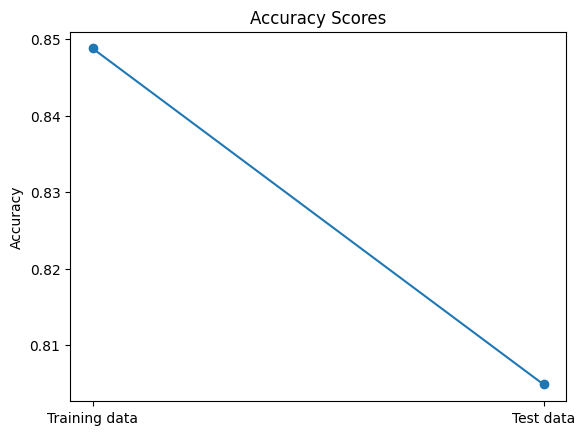

In [333]:
model = LogisticRegression()
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Training data : ', training_data_accuracy.round(2)*100,"%")
print('Accuracy on Test data : ', test_data_accuracy.round(2)*100,"%")

# Plot the accuracy scores
plt.plot([training_data_accuracy, test_data_accuracy], marker='o')

# Add labels and title to the plot
plt.xticks([0, 1], ['Training data', 'Test data'])
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Show the plot
plt.show()

In [334]:
input_data = ((50,0,1,120,244,0,1,162,0,1.1,2,0,2))
print("Input data for the a Person1 :",input_data)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Prediction:",prediction)
if (prediction[0]== 0):
  print("Result: (0)The Person don't have Heart Disease")
else:
  print('Result: (1)The Person have Heart Disease')

Input data for the a Person1 : (50, 0, 1, 120, 244, 0, 1, 162, 0, 1.1, 2, 0, 2)
Prediction: [1]
Result: (1)The Person have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [335]:
input_data2 = (51,1,0,140,298,0,1,122,1,4.2,1,3,3)
print("Input data for the a Person1 :",input_data2)
# change the input data to a numpy array
input_data_as_numpy_array_1= np.asarray(input_data2)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped_1 = input_data_as_numpy_array_1.reshape(1,-1)
prediction_1 = model.predict(input_data_reshaped_1)
print("Prediction:",prediction_1)
if (prediction_1[0]== 0):
  print("Result: (0)The Person don't have Heart Disease")
else:
  print('Result: (1)The Person have Heart Disease')

Input data for the a Person1 : (51, 1, 0, 140, 298, 0, 1, 122, 1, 4.2, 1, 3, 3)
Prediction: [0]
Result: (0)The Person don't have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



# Decision Tree Classifier

In [336]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

scores_dict = {}
Catagory=["Result: (0)The Person don't have Heart Disease",'Result: (1)The Person have Heart Disease']
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [337]:
X_DT=np.array([[50,0,1,120,244,0,1,162,0,1.1,2,0,2]])
print("Input data for the a Person1 :",X_DT)
X_DT_prediction=dt.predict(X_DT)
print(Catagory[int(X_DT_prediction[0])])

Input data for the a Person1 : [[ 50.    0.    1.  120.  244.    0.    1.  162.    0.    1.1   2.    0.
    2. ]]
Result: (1)The Person have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [338]:
X_DT1=np.array([[51,1,0,140,298,0,1,122,1,4.2,1,3,3]])
print("Input data for the a Person2 :",X_DT1)
X_DT_prediction=dt.predict(X_DT1)
print(Catagory[int(X_DT_prediction[0])])

Input data for the a Person2 : [[ 51.    1.    0.  140.  298.    0.    1.  122.    1.    4.2   1.    3.
    3. ]]
Result: (0)The Person don't have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



# KNN

In [339]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(Y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(Y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 1 with score : 1.0


In [340]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
prediction_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, prediction_knn) * 100
print('accuracy_score score: ', accuracy_knn, '%')
print('mean_squared_error score: ', mean_squared_error(Y_test, prediction_knn) * 100, '%')

accuracy_score score:  100.0 %
mean_squared_error score:  0.0 %


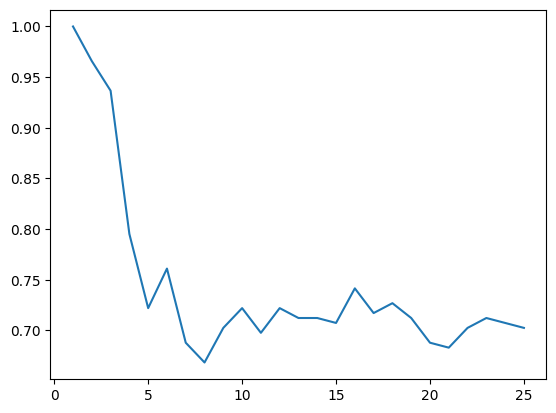

In [341]:
plt.plot(k_range,scores_list)


In [342]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train contains your training data
sc = StandardScaler()
sc.fit(X_train)

X_knn=np.array([[51,1,0,140,298,0,1,122,1,4.2,1,3,3]])
print("Input data for the a Person1 :",X_knn)
X_knn_prediction=dt.predict(X_knn)
print(Catagory[int(X_knn_prediction[0])])

Input data for the a Person1 : [[ 51.    1.    0.  140.  298.    0.    1.  122.    1.    4.2   1.    3.
    3. ]]
Result: (0)The Person don't have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [343]:
X_knn1=np.array([[50,0,1,120,244,0,1,162,0,1.1,2,0,2]])
print("Input data for the a Person2 :",X_knn1)
X_knn_prediction=dt.predict(X_knn1)
print(Catagory[int(X_knn_prediction[0])])

Input data for the a Person2 : [[ 50.    0.    1.  120.  244.    0.    1.  162.    0.    1.1   2.    0.
    2. ]]
Result: (1)The Person have Heart Disease


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

